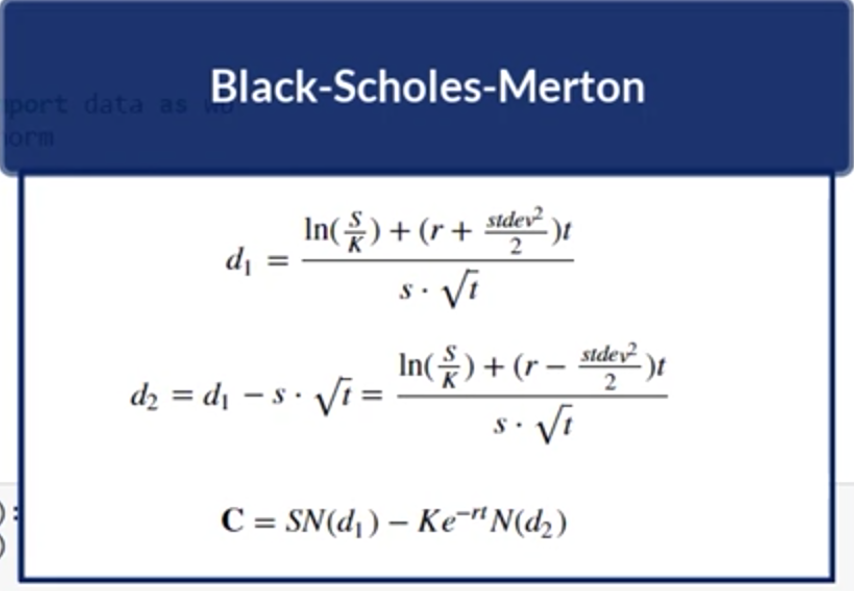

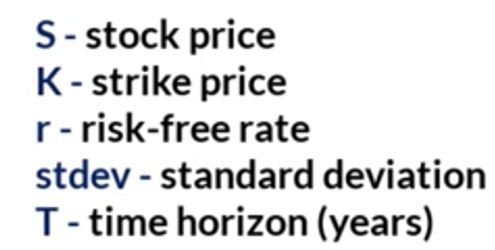

In [1]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

#### How to calculate CDF

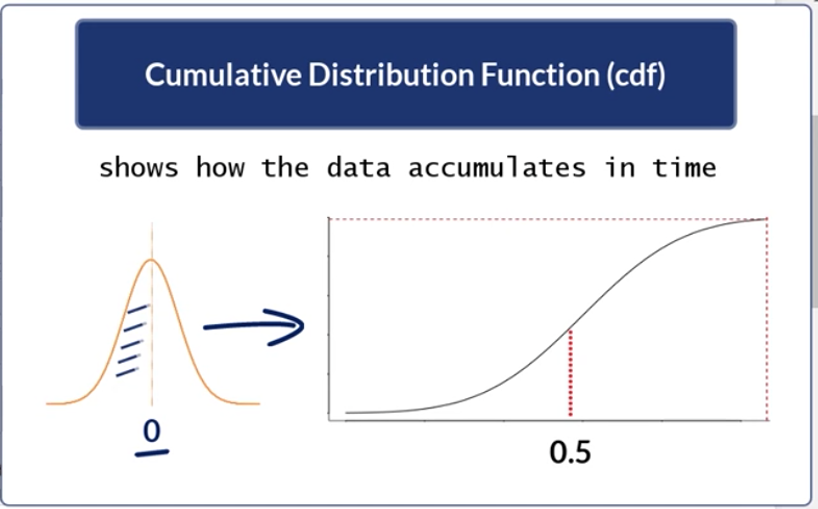

In [2]:
from scipy.stats import norm

norm.cdf(0), norm.cdf(0.25), norm.cdf(0.5), norm.cdf(0.75), norm.cdf(5), norm.cdf(9), norm.cdf(10)

(0.5,
 0.5987063256829237,
 0.6914624612740131,
 0.7733726476231317,
 0.9999997133484281,
 1.0,
 1.0)

# Import Data

In [3]:
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta

#start downloading data from 10 years ago
today = datetime.today()
start_date = today - relativedelta(years=10)

data = yf.download('PG', start=start_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data = data[['Adj Close']]
data

,Adj Close
Date,
2015-01-02,68.275764
2015-01-05,67.951157
2015-01-06,67.641624
2015-01-07,67.996437
2015-01-08,68.774025
...,...
2024-12-24,168.940002
2024-12-26,170.160004
2024-12-27,169.529999


# Calculate S, stdev and r

#### Stock Price (S)

In [5]:
S = data.iloc[-1]
S

Adj Close    167.649994
Name: 2024-12-31 00:00:00, dtype: float64

#### Standard Deviation (stdev)

In [6]:
import numpy as np

log_returns = np.log(1 + data.pct_change())

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

Adj Close    0.183833
dtype: float64

#### Risk Free (r)

In [8]:
r = yf.download('^IRX')['Adj Close'].iloc[-1] / 100
r

[*********************100%%**********************]  1 of 1 completed


0.04208000183105469

# Define Black-Scholes-Merton Formula

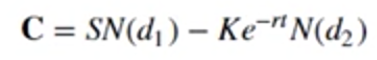

In [9]:
def BSM_Call (S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [10]:
start_date = datetime.today()

# Maturity date of the option
end_date = datetime.strptime('25/04/17', '%y/%m/%d')

days_to_maturity = (end_date - start_date).days
days_to_maturity

# T = time in years
T = days_to_maturity / 365
T

0.28493150684931506

In [11]:
# K = strike price
K = 170

# Calculate Call Option Price

In [12]:
d1(S, K, r, stdev, T)

Adj Close    0.029395
dtype: float64

In [13]:
d2(S, K, r, stdev, T)

Adj Close   -0.068733
dtype: float64

In [14]:
BSM_Call(S, K, r, stdev, T)

Adj Close    6.406105
Name: 2024-12-31 00:00:00, dtype: float64

# Calculate Put Option Price

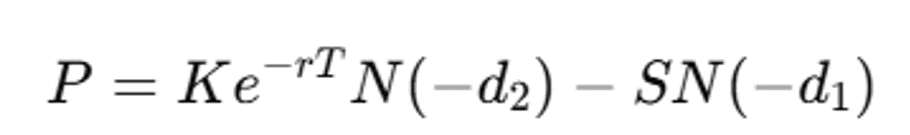

In [15]:
def BSM_Put (S, K, r, stdev, T):
    return (K * np.exp(-r * T) * norm.cdf(-d2(S, K, r, stdev, T))) - (S * norm.cdf(-d1(S, K, r, stdev, T)))

In [16]:
BSM_Put(S, K, r, stdev, T)

Adj Close    6.729996
Name: 2024-12-31 00:00:00, dtype: float64